In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
import speechbrain as sb
from speechbrain.processing.features import STFT, spectral_magnitude, Filterbank
import torchaudio
import torch
from loggers.wave_loggers import print_stats, plot_waveform, plot_spectrogram, plot_filterbank

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [4]:
blue_exp_path = 'data/genres_original/blues/blues.00000.wav'
waveform, sample_rate = torchaudio.load(blue_exp_path)
print('waveform.shape: ', waveform.shape)
print('sample_rate: ', sample_rate)

waveform.shape:  torch.Size([1, 661794])
sample_rate:  22050


In [5]:
print_stats(waveform)

Shape: (1, 661794)
Dtype: torch.float32
 - Max:      0.885
 - Min:     -0.840
 - Mean:    -0.000
 - Std Dev:  0.141

tensor([[ 0.0073,  0.0166,  0.0076,  ..., -0.0556, -0.0611, -0.0642]])



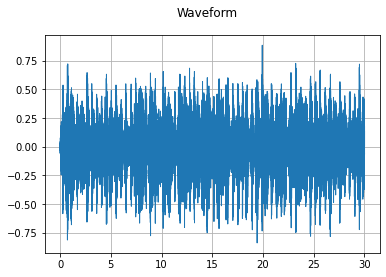

In [6]:
plot_waveform(waveform, sample_rate)

In [7]:
compute_STFT = STFT(
     sample_rate=22050, win_length=15, hop_length=20, n_fft=400
 )
features = compute_STFT(waveform)

In [12]:
print_stats(features)

Shape: (1, 1501, 201, 2)
Dtype: torch.float32
 - Max:     44.196
 - Min:     -36.092
 - Mean:     0.000
 - Std Dev:  1.152

tensor([[[[-1.8304e+00,  0.0000e+00],
          [ 9.0893e-01, -1.2626e+00],
          [ 2.2452e-01,  9.2256e-01],
          ...,
          [-5.7539e-04, -1.4305e-06],
          [ 5.3835e-04, -8.0556e-05],
          [-4.2814e-04,  0.0000e+00]],

         [[-7.3778e-01,  0.0000e+00],
          [ 8.8527e-01, -1.8178e+00],
          [-4.8457e-01,  1.1668e+00],
          ...,
          [-5.6624e-04, -5.9080e-04],
          [-1.0509e-03, -3.1620e-04],
          [-1.2504e-03,  0.0000e+00]],

         [[ 5.9041e-01,  0.0000e+00],
          [-4.9690e-01, -6.3864e-01],
          [ 2.1120e-01, -9.5664e-01],
          ...,
          [ 1.9723e-04,  7.3433e-05],
          [ 5.8851e-04,  6.3002e-05],
          [ 6.7535e-04,  0.0000e+00]],

         ...,

         [[ 3.8383e+00,  0.0000e+00],
          [-2.8315e+00,  6.4238e-01],
          [-1.1601e-02,  7.0349e-01],
          ..

In [9]:
sptr = spectral_magnitude(features)

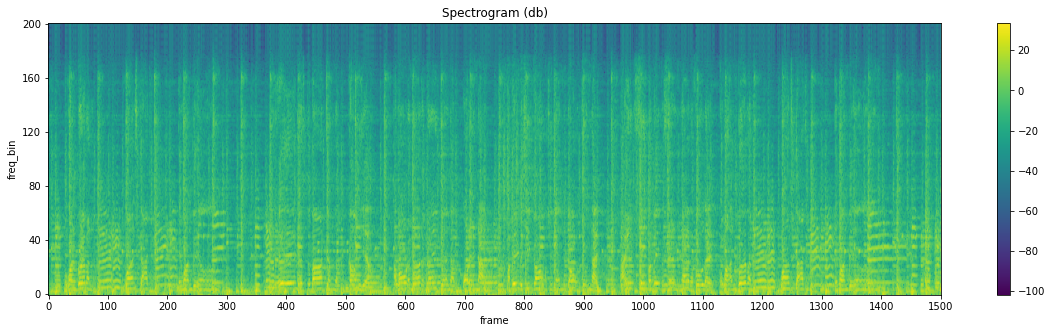

In [10]:
plot_spectrogram(sptr[0].T)

In [11]:
print_stats(sptr)

Shape: (1, 1501, 201)
Dtype: torch.float32
 - Max:     2294.995
 - Min:      0.000
 - Mean:     2.654
 - Std Dev: 21.311

tensor([[[3.3503e+00, 2.4202e+00, 9.0152e-01,  ..., 3.3108e-07,
          2.9631e-07, 1.8330e-07],
         [5.4432e-01, 4.0879e+00, 1.5963e+00,  ..., 6.6968e-07,
          1.2045e-06, 1.5635e-06],
         [3.4858e-01, 6.5478e-01, 9.5976e-01,  ..., 4.4293e-08,
          3.5031e-07, 4.5610e-07],
         ...,
         [1.4733e+01, 8.4299e+00, 4.9503e-01,  ..., 2.3810e-06,
          3.7953e-06, 5.5876e-06],
         [1.3078e+01, 2.9486e+01, 1.2402e+02,  ..., 8.3777e-05,
          9.6187e-05, 9.2610e-05],
         [2.1454e+00, 9.5613e-01, 2.4220e+01,  ..., 5.9606e-05,
          3.5936e-05, 2.4057e-05]]])



In [13]:
compute_fbanks = Filterbank(n_mels=20, sample_rate=22050)
fbanks = compute_fbanks(sptr)

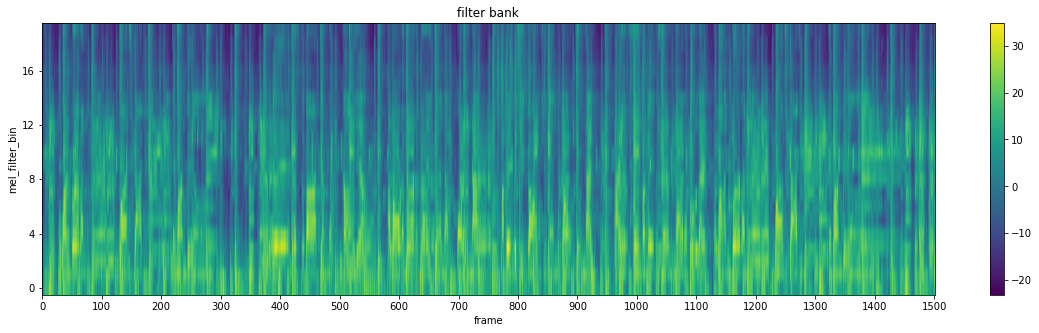

In [14]:
plot_filterbank(fbanks[0].T)

In [15]:
print_stats(fbanks)

Shape: (1, 1501, 20)
Dtype: torch.float32
 - Max:     34.828
 - Min:     -23.129
 - Mean:     4.536
 - Std Dev:  9.687

tensor([[[  3.4356,  -4.7799,  -4.7534,  ..., -16.6350, -13.3213, -11.6299],
         [  5.8287,   4.1660,   3.1059,  ..., -12.6364, -13.7558, -11.3305],
         [  1.6674,   3.5431,   3.2165,  ..., -14.2910, -15.5826, -13.8522],
         ...,
         [  8.4646,   9.9716,   8.3535,  ..., -13.5903, -16.1250, -17.3082],
         [ 21.5716,  24.3127,  18.1555,  ...,  -3.6159,  -4.8294,  -6.0342],
         [ 15.6785,  24.7268,  23.3930,  ...,  -0.7799,  -6.3318,  -8.3668]]])

